In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace import sarimax
from scipy.stats import boxcox

from load_dataset import Dataset
import plotting

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
dataset = Dataset('../data/Dataset')

In [146]:
ts = dataset['international-airline-passengers.csv']
ts.index = ts.index.map(pd.to_datetime)

In [147]:
ts.index = [ i for i in range(len(ts))]

In [148]:
ts, ts_test = ts[:100], ts[100:]

<AxesSubplot:>

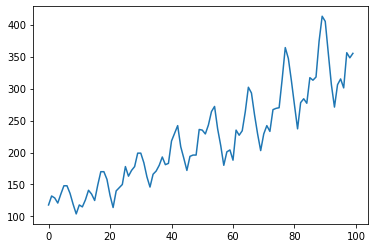

In [149]:
ts.plot()

C:\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


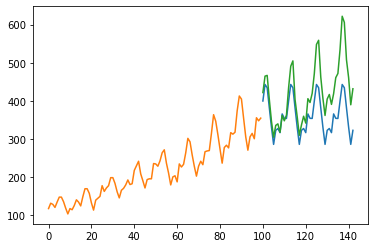

In [157]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(ts, seasonal='mul', seasonal_periods=12).fit()
pred = model.predict(start=ts_test.index[0], end=ts_test.index[-1])
plt.plot(pred.index, pred, label='Holt-Winters')
plt.plot(ts.index, ts, label='Train')
plt.plot(ts_test.index, ts_test, label='Test')

In [150]:
from statsmodels.tsa.holtwinters import Holt
def Holtw(ts_train, ts_test):
    model = Holt(np.asarray(ts_train)).fit()
    out_of_sample = model.predict(start = ts_test.index[0], end = ts_test.index[-1])
    out_of_sample = pd.Series(np.array(out_of_sample), index = ts_test.index)
    return out_of_sample

In [152]:
#Holtw(ts, ts_test)

In [153]:
plotting.plot_ts(ts_test, Holtw(ts, ts_test))

Loading BokehJS ...

C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:>

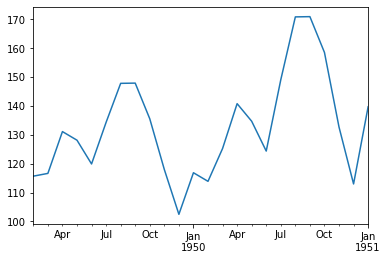

In [47]:
Holtw(ts, ts_test).plot()

In [33]:
from statsmodels.tsa.holtwinters import Holt

In [34]:
model = Holt(ts)

C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [35]:
fit = model.fit()

In [36]:
preds = fit.predict(start = 1, end = len(ts_test))

<AxesSubplot:xlabel='1949-01'>

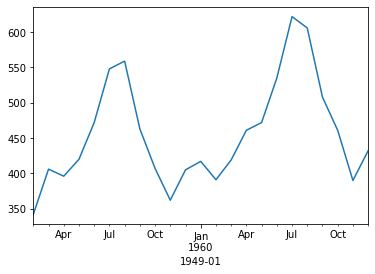

In [37]:
ts_test.plot()

<AxesSubplot:>

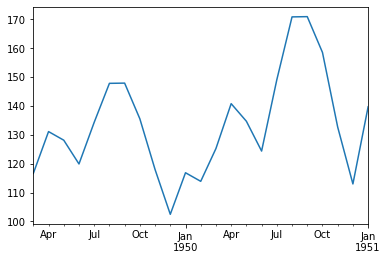

In [38]:
preds.plot()

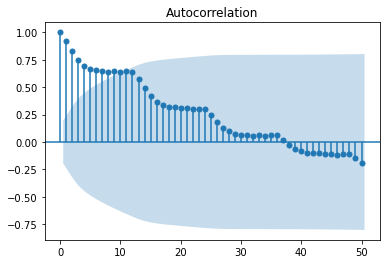

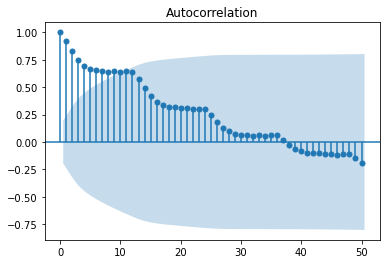

In [13]:
plot_acf(ts, lags = 50)

#### Задание 1. Box-Jenkins approach
1. Убрать гетероскедастичность при помощи логарифмирования.
2. Продифференцировать разными способами и узнать нужный порядок дифференцирования d, D, анализируя
   получившийся ряд при помощи графика acf_plot и теста дикки-фуллера.
3. Найти (если модель разделима) или оценить (если не разделима) параметры (q, Q), (p, P) по графикам acf, pacf продифференцированного ряда.
4. Обучить модель SARIMA и попробовать сделать предсказания исходного ряда.
5. Критерий хорошей модели (в идеале) - стационарные остатки.

In [9]:
# <ваш код здесь>

#### Задание 2. (используя критерий Акаике)
1. Взять параметры дифференцирования d, D из задания 1.
2. Выбрать сетку гиперпараметров (не брать большие значения).
3. Для кадого набора параметров:
    * обучить модель SARIMAX на логарифмированном ряде (все остальные преобразования к стационарному ряду модель сделает за вас)
    * получить aic модели (хранится в аттрибуте aic обученной модели)
    * запомнить aic для такого-то набора параметров
4. Выбрать модель с набором гиперпараметров, дающих минимальный aic.
5. Сделать предсказание ts_log на тестовую выборку. 
6. Восстановить предсказания обратным преобразованием.
7. Проанализировать остатки

In [10]:
# ваш код здесь

#### Задание 3. (используя auto-arima)
1. Установить аналог auto-arima из R, библиотеку pmdarima (pip install pmdarima)
2. Обучить модель, используя функцию auto_arima, передав в нее нужные параметры.